## Introduction
The objective of this project is the analysis of hotels in NYC by results orientiented data from tripadvisor. What are successful/unsuccessful hotels doing? What can a hotel do to promote their business?

<p><a name="sections"></a></p>

# Table of Contents

- <a href="#ma">Map Location</a><br>
- <a href="#hr">Hotel Rating</a><br>
- <a href="#ms">Measuring Success</a><br>
- <a href="#la">Location Analysis</a><br>
- <a href="#ha">Hotel Amenities</a><br>



In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('test.csv')

<p><a name="ma"></a></p>

# Map Location

Create a heat map with all the hotel locations

In [5]:
#Method 1
#Store lat and lon corrd
#Run only once or you will get Error 429
import folium
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim

lat=[]
lon=[]
geolocator = Nominatim(timeout=5)
sgeocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

i=0
for address in data['address']:
    loc = geolocator.geocode(str(address))
    if loc != None:
        lat.append(loc.latitude)
        lon.append(loc.longitude)    
    print(i)
    i+=1
m = folium.Map(location=[40.76, -74.00], tiles="OpenStreetMap", zoom_start=12)
Sample_coord = pd.DataFrame({'lat':lat,'lon':lon}).as_matrix()

m.add_child(plugins.HeatMap(Sample_coord, radius=20))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  if __name__ == '__main__':


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [6]:
df_add = data[['title','address']]

In [8]:
#Method 2
#Converts address to coord with timer to prevent 403 and 429.
from tqdm import tqdm
tqdm.pandas()
geolocator = Nominatim(timeout=5, user_agent = 'my-application')
sgeocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

df_add['location'] = df_add['address'].progress_apply(sgeocode)

pd.options.display.max_colwidth = 300
print(df_add[['location']].iloc[0,])
pd.options.display.max_colwidth = 50

/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 714/714 [18:27<00:00,  1.55s/it]

location    (AMC Empire 25, 234, West 42nd Street, Times Square, Theater District, Manhattan Community Board 5, Manhattan, New York County, New York, 10036, United States of America, (40.75668515, -73.98926649582987))
Name: 0, dtype: object



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
#All Hotels Location Heatmap
from folium import plugins
Manhattan = [40.76, -74.00]
lat =[]
lon =[]
for loc in df_add['location']:
    if loc != None:
        lat.append(loc.latitude)
        lon.append(loc.longitude)
m = folium.Map(location=Manhattan, tiles="OpenStreetMap", zoom_start=11)
Sample_coord = pd.DataFrame({'lat':lat,'lon':lon}).values
m.add_child(plugins.HeatMap(Sample_coord, radius=20))

<p><a name="hr"></a></p>

# Hotel Ratings


In [9]:
#Plot a barplot that displays rating & number of hotels
count_ratings = data.rating.value_counts().sort_index(ascending=False)
df2 = pd.DataFrame({'Ratings Count': count_ratings})

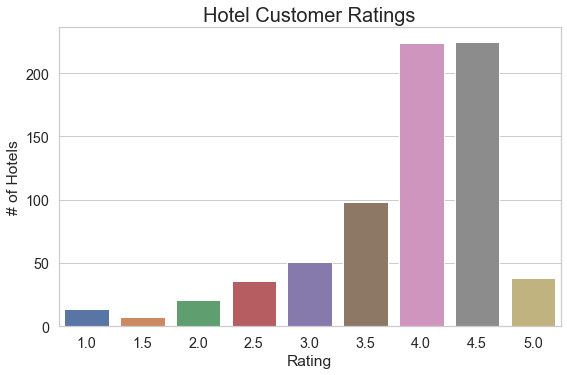

In [13]:
sns.set(style = 'whitegrid', font_scale = 1.3)
plt.subplots( figsize=(9,5.5) )

Rating_bar = sns.barplot(data = df2.reset_index(), x='index',y='Ratings Count', palette ='deep')
Rating_bar.set(xlabel='Rating',ylabel='# of Hotels')

plt.title('Hotel Customer Ratings',size = 20)
plt.show(Rating_bar)

<p><a name="ms"></a></p>

# Measuring Success

In [24]:
#Change the string total reviews to float or int
data['total_reviews'] = data['total_reviews'].apply(lambda x: x.replace('review',''))
data['total_reviews'] = data['total_reviews'].apply(lambda x: x.replace(' s','').replace(',','').strip())
data['total_reviews'] = data['total_reviews'].apply(lambda x: float(x))

In [26]:
#Fixed excellent score
data['num_excellent']=data['num_excellent'].apply(lambda x: float(x.replace(',','').strip() ))

data['excellent'] = round(data['num_excellent'] / data['total_reviews'],2)
Hqol2 = data[['title','excellent','rating','total_reviews']]

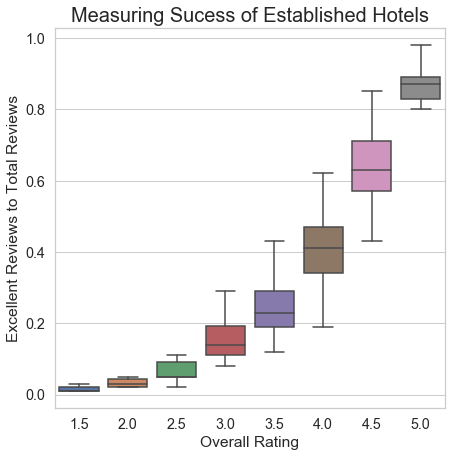

In [27]:
#Boxplot of excellent hotels with reviews over 50 and review
Review_a50= Hqol2.loc[data['total_reviews'] >= 50]

sns.set(style = 'whitegrid', font_scale = 1.3)
plt.subplots( figsize=(7,7) )

Ehotel_bar = sns.boxplot(data = Review_a50, x='rating',y='excellent')
Ehotel_bar.set(xlabel='Overall Rating',ylabel='Excellent Reviews to Total Reviews')

plt.title('Measuring Sucess of Established Hotels',size = 20)
plt.show(Rating_bar)

<p><a name="la"></a></p>

# Location Analysis

In [30]:
#Define Excellent, Good, Poor Hotels using Hotels with at least 50 reviews
Excell_Hotels = Review_a50.loc[data['rating'] >= 4.5]
Good_Hotels = Review_a50.loc[(data['rating'] < 4.5) & (data['rating'] >= 3)]
Poor_Hotels = Review_a50.loc[data['rating'] < 3]

df_loc_review = pd.merge(df_add, Review_a50, how = 'inner', on ='title')

In [33]:
#Locations of Excellent Hotels (50+ reviews)

Excell_Hotels_L = df_loc_review.loc[data['rating'] >= 4.5]
print(Excell_Hotels_L.shape)
lat=[]
lon=[]
for coord in Excell_Hotels_L['location']:
    if coord != None:
        lat.append(coord.latitude)
        lon.append(coord.longitude)
Sample_coord = pd.DataFrame({'lat':lat,'lon':lon}).values
m_Excell = folium.Map(location= Manhattan, tiles="OpenStreetMap", zoom_start=12)
m_Excell.add_child(plugins.HeatMap(Sample_coord, radius=15))

(157, 6)


In [34]:
#Locations of Good Hotels

Good_Hotels_L = df_loc_review.loc[(data['rating'] < 4.5) & (data['rating'] >= 3)]
print(Good_Hotels_L.shape)
lat=[]
lon=[]
for coord in Good_Hotels_L['location']:
    if coord != None:
        lat.append(coord.latitude)
        lon.append(coord.longitude)
Sample_coord = pd.DataFrame({'lat':lat,'lon':lon}).values
m_Good = folium.Map(location= Manhattan, tiles="OpenStreetMap", zoom_start=12)
m_Good.add_child(plugins.HeatMap(Sample_coord, radius=15))

(284, 6)


In [35]:
#Locations of Poor Hotels

Poor_Hotels_L = df_loc_review.loc[data['rating'] < 3]
print(Poor_Hotels_L.shape)
lat=[]
lon=[]
for coord in Poor_Hotels_L['location']:
    if coord != None:
        lat.append(coord.latitude)
        lon.append(coord.longitude)
Sample_coord = pd.DataFrame({'lat':lat,'lon':lon}).values
m_Poor = folium.Map(location= Manhattan, tiles="OpenStreetMap", zoom_start=12)
m_Poor.add_child(plugins.HeatMap(Sample_coord, radius=15))

(78, 6)


<p><a name="ha"></a></p>

# Hotel Amenities

In [37]:
df4 = data[['title','amenities']]
df4['amenities'] = df4['amenities'].apply(lambda x: str(x).split(sep=','))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
# Create a list of provided amenities
Amenity = []
for i in df4['amenities']:
    if i != ['nan']:
        for j in i:
            Amenity.append(j)
Amenity_lst = Amenity
Amenity_unique = list(set(Amenity))
len(Amenity_unique)

230

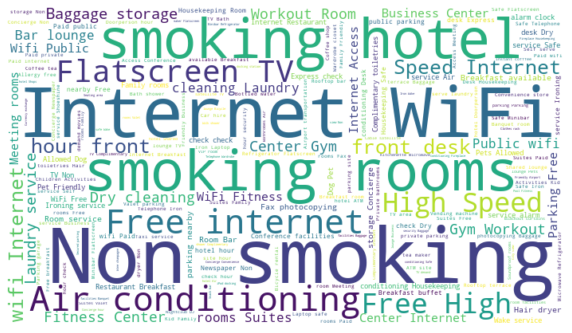

In [45]:
#Common hotel services
from wordcloud import WordCloud 

wc = WordCloud(background_color="white", max_words=200, width=700, height=400, min_font_size = 2)
wc.generate(' '.join(Amenity_lst))
plt.figure(figsize=(10, 9))
plt.imshow(wc, interpolation='bilinear') #show image wordcloud and fill it as bilinear.
plt.axis("off")
plt.show()

In [47]:
df5 = data[['title', 'amenities', 'rating','total_reviews']]
df5['amenities'] = df5['amenities'].apply(lambda x: str(x).split(sep=','))
df5 = df5.loc[df5['total_reviews']>=50]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


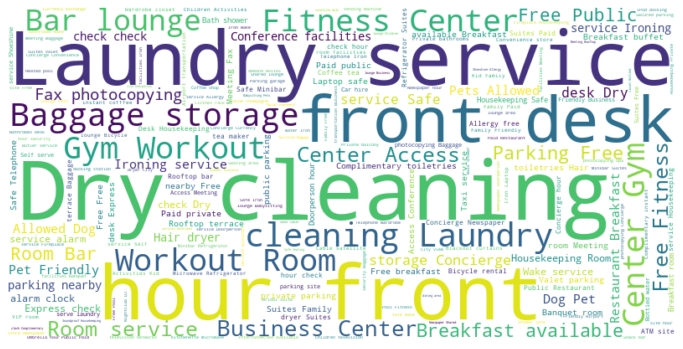

214


14.746477132262052

In [48]:
Excell_h_service = df5['amenities'].loc[df5['rating']>=4.5]

Excell_Amenity = []
num_amenity = []
for service_lst in Excell_h_service:
    if service_lst != ['nan']:
        for service in service_lst:
            num_amenity.append( len(service))
            Excell_Amenity.append(service)
stop_words = ["air","conditioning","Internet","Flatscreen","TV","Non smoking","smoking","wifi","Non","rooms","hotel","High", "Speed"] + list(wordcloud.STOPWORDS)
wc = WordCloud(background_color="white", max_words=200, width=800, height=400, min_font_size = 2, stopwords = stop_words)

wc.generate(' '.join(Excell_Amenity))
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear') #show image wordcloud and fill it as bilinear.
plt.axis("off")
plt.show()
print(len(set(Excell_Amenity)))
sum(num_amenity)/len(num_amenity)

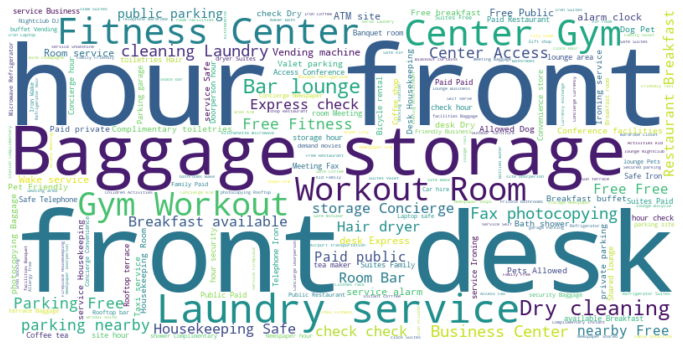

206


14.80428534099817

In [50]:
Good_h_service = df5['amenities'].loc[(df5['rating']>=3.0) & (df5['rating'] < 4.5)]

Good_Amenity = []
num_amenity = []
for service_lst in Good_h_service:
    if service_lst != ['nan']:
        for service in service_lst:
            num_amenity.append(len(service))
            Good_Amenity.append(service)
stop_words = ["air","conditioning", "Internet","Flatscreen","TV","Non smoking","smoking","wifi","Non","rooms","hotel","High", "Speed"] + list(wordcloud.STOPWORDS)

wc = WordCloud(background_color="white", max_words=200, width=800, height=400, min_font_size = 2, stopwords = stop_words)

wc.generate(' '.join(Good_Amenity))
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear') #show image wordcloud and fill it as bilinear.
plt.axis("off")
plt.show()
print(len(set(Good_Amenity)))
sum(num_amenity)/len(num_amenity)

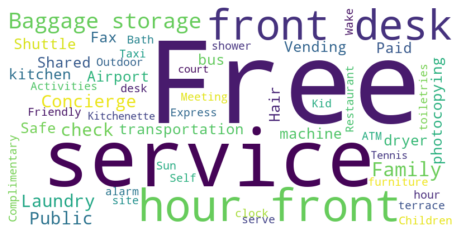

39


14.752293577981652

In [51]:
Poor_h_service = df5['amenities'].loc[df5['rating'] < 3.0]

Poor_Amenity = []
num_amenity=[]
for service_lst in Poor_h_service:
    if service_lst != ['nan']:
        for service in service_lst:
            num_amenity.append(len(service))
            Poor_Amenity.append(service)
stop_words = ["air","conditioning","Internet","Flatscreen","TV","Non smoking","smoking","wifi","Non","rooms","hotel","High", "Speed"] + list(wordcloud.STOPWORDS)

wc = WordCloud(background_color="white", max_words=200, width=800, height=400, min_font_size = 2, stopwords = stop_words)

wc.generate(' '.join(Poor_Amenity))
plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation='bilinear') #show image wordcloud and fill it as bilinear.
plt.axis("off")
plt.show()
print(len(set(Poor_Amenity)))
sum(num_amenity)/len(num_amenity)